# Business Problem: Predicting Customer Lifetime Value (CLV)

Customer Lifetime Value (CLV) is a crucial business metric that estimates the total amount of revenue that a customer is expected to generate over their entire lifetime. The higher the CLV, the more valuable the customer is to the business. By predicting the CLV of each customer, a bank can identify its most valuable customers and focus its marketing and retention efforts on them. This can help the bank increase customer loyalty, reduce churn, and improve its overall profitability.

## Data mining technique used: Regression Analysis

Regression analysis can be used to predict the CLV of each customer. By using the demographic and transactional data of customers from the given dataset, we can train a regression model to predict the total amount of revenue that each customer is expected to generate over their entire lifetime. We can use features such as age, income, transaction history, and location to train the model. Once the model is trained, we can use it to predict the CLV of new customers and identify the most valuable ones.


## Data Description 
<strong>' <i>transactions.csv</i> '</strong> has the following data:-
| cc_num | acct_num | trans_num | unix_time | category | amt | is_fraud | merchant | merch_lat | merch_long |
| --- | --- | --- | --- | --- | --- |  --- | --- | --- |  --- |

<ul>
<li>category: this column conatins category of the payment like gas_transport, grocery_pos, etc</li>
<li>amt: This column contains amount</li>
<li>is_fraud: This column conatins a flag varibale for fraud transaction</li>
<li>acct_num: This column conatins account number of the customer</li>
<li>trans_num: This column conatins the unique ID for transaction</li>
<li>cc_num: This column conatins credit card reference number</li>
<li>merchant_name: This column conatins merchant name</li>
<li>merch_lat: This column conatins merchant latitude</li>
<li>merch_long: This column conatins merchent longitude</li>
<li>unix_time: This column conatins unix time</li>
</ul>

<strong>' <i>customer.csv</i> '</strong> has the following data:-
| snn | cc_num | first | last | gender | street | city | state | zip | lat | long | city_pop | job | dob | acct_num |
| --- | --- | --- | --- | --- | --- |  --- | --- | --- |  --- | --- | --- | --- | --- | --- |
<ul>
<li>first: This column conatins first name of the customer</li>
<li>last: This column conatins last name of the customer</li>
<li>gender: This column conatins gender of the customer</li>
<li>ssn: This column conatins Social Security Number</li>
<li>street: This column conatins street name of the customer's address</li>
<li>city: This column conatins city name of the customer's address</li>
<li>state: TThis column conatins state name of the customer's address</li>
<li>zip: This column conatins zip code of the customer's address</li>
<li>lat: This column conatins latitude of the customer's address</li>
<li>long: This column conatins longitude of the customer's address</li>
<li>city_pop: This column conatins City Population</li>
<li>job: This column conatins customer's job description</li>
<li>dob: This column conatins customer's date of birth</li>
<li>acct_num: This column conatins account number of the customer</li>
</ul>

Here are the steps to build a Machine Learning Model for predicting CLV:

### Step 1: Importing required libraries and packages

In [1]:
import pandas as pd
import glob
import os
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

## <center>If you have 'merged_data.csv', just load it and skip to step 3 or [click here](#section3)</center>

### Step 2: Data Preprocessing

1. Load the transactional data from the CSV files.

In [ ]:
def process_transactions_files():
    for i in range(132):
        # Generate the filename
        filename = f'dataset/transactions_{i}.csv'
        
        # Load CSV file
        df = pd.read_csv(filename, delimiter='|')

        # Print the DataFrame
        print(f'{filename}:')
        print(df)

        # Save the DataFrame to a new CSV file
        new_filename = f'dataset/new_transactions_{i}.csv'
        df.to_csv(new_filename, index=False)

process_transactions_files()

2. Merge the all the transactional data into one file


In [ ]:
# Define the directory where the files are located
directory = "dataset"

# Define the filename for the merged file
merged_filename = "transactions.csv"

# Create a CSV writer object with '|' as the delimiter for the merged file
with open(os.path.join(directory, merged_filename), 'w', newline='') as outfile:
    writer = csv.writer(outfile, delimiter='|')
    
    # Loop through all the files that match the pattern
    for filename in glob.glob(directory + "/transactions_[0-9]*.csv"):
        # Open the file for reading
        with open(filename, 'r') as infile:
            # Create a CSV reader object with '|' as the delimiter
            reader = csv.reader(infile, delimiter='|')
            
            # Loop through each row in the file and write it to the merged file
            for row in reader:
                writer.writerow(row)

trans= pd.read_csv('dataset/transactions.csv', delimiter='|')
trans.to_csv('transactions.csv', index=False)
trans

3. Remove any unnecessary columns and handle missing or inconsistent data.

In [ ]:
trans.dropna()

4. Loading customer data from CSV file

In [ ]:
# Load CSV file
df = pd.read_csv('dataset/customers.csv', delimiter='|')
# Print the DataFrame
print(df)
# Save the DataFrame to a new CSV file
df.to_csv('customers.csv', index=False)

In [ ]:
cus= pd.read_csv('customers.csv')
cus.dropna()
cus

In [2]:
trans = pd.read_csv('transactions.csv')
cus = pd.read_csv('customers.csv')

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_18713/2234585526.py:1: DtypeWarning: Columns (0,1,3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('transactions.csv')


5. Checking for null values

In [ ]:
null_values_trans = trans.isnull().sum()
print("transactions.csv:")
print(null_values_trans, end='\n\n')
print("customers.csv:")
null_values_cus = cus.isnull().sum()
print(null_values_cus)

6. Checking data types for each column

In [ ]:
print("Data type of each column in transactions.csv:")
print(trans.dtypes, end="\n\n")
print("Data type of each column in customers.csv:")
print(cus.dtypes, end="\n\n")

7. Mearging both csv files into one file

In [ ]:
merged_data = pd.merge(trans, cus, on="acct_num")
print(merged_data.columns)
merged_data.to_csv('merged_data.csv', index=False)
null_values_merged_data = merged_data.isnull().sum()
print(null_values_merged_data)

<a id="section3"></a>

### Step 3: Feature Engineering

1. Dropping unwanted columns

In [8]:
# Drop unnecessary columns
#merged_data.drop(['trans_num', 'cc_num_x', 'cc_num_y', 'merchant'], axis=1, inplace=True)
# Handle missing values
merged_data = pd.read_csv('merged_data.csv')
transactions = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')
merged_data.fillna(0, inplace=True)

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_10757/2695368701.py:5: DtypeWarning: Columns (0,1,3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv('transactions.csv')


In [9]:
transactions.shape

(4261035, 10)

In [10]:
customers.shape

(1000, 15)

In [11]:
merged_data.shape

(1705131, 24)

In [3]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705131 entries, 0 to 1705130
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num_x    int64  
 1   acct_num    int64  
 2   trans_num   object 
 3   unix_time   int64  
 4   category    object 
 5   amt         float64
 6   is_fraud    int64  
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
 10  ssn         object 
 11  cc_num_y    int64  
 12  first       object 
 13  last        object 
 14  gender      object 
 15  street      object 
 16  city        object 
 17  state       object 
 18  zip         int64  
 19  lat         float64
 20  long        float64
 21  city_pop    int64  
 22  job         object 
 23  dob         object 
dtypes: float64(5), int64(7), object(12)
memory usage: 312.2+ MB


In [5]:
merged_data.describe()

,cc_num_x,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long,cc_num_y,zip,lat,long,city_pop
count,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06,1.705131e+06
mean,4.107406e+17,4.971373e+11,1.611078e+09,7.126194e+01,7.190063e-04,3.737953e+01,-9.174718e+01,4.107406e+17,5.125834e+04,3.737950e+01,-9.174640e+01,3.145833e+05
std,1.293583e+18,2.905397e+11,3.648932e+07,1.581055e+02,2.680466e-02,5.583652e+00,1.644449e+01,1.293583e+18,2.926924e+04,5.553923e+00,1.643393e+01,5.675419e+05
min,6.042928e+10,2.348758e+09,1.546261e+09,1.000000e+00,0.000000e+00,1.870250e+01,-1.588275e+02,6.042928e+10,1.571000e+03,1.970250e+01,-1.578284e+02,1.710000e+03
25%,2.131270e+14,2.593455e+11,1.577732e+09,9.580000e+00,0.000000e+00,3.361558e+01,-9.847466e+01,2.131270e+14,2.811000e+04,3.371690e+01,-9.867220e+01,2.198500e+04
50%,3.550106e+15,4.759571e+11,1.609511e+09,4.612000e+01,0.000000e+00,3.835259e+01,-8.688335e+01,3.550106e+15,4.834600e+04,3.845340e+01,-8.692370e+01,7.443800e+04
75%,4.640859e+15,7.572477e+11,1.641097e+09,8.361000e+01,0.000000e+00,4.140874e+01,-7.974548e+01,4.640859e+15,7.811400e+04,4.142010e+01,-8.000550e+01,2.701000e+05
max,4.983666e+18,9.993899e+11,1.672492e+09,3.141268e+04,1.000000e+00,6.577610e+01,-6.919192e+01,4.983666e+18,9.970500e+04,6.478050e+01,-7.019160e+01,2.906700e+06


2. Ploting graphs

In [6]:
grouped_data = merged_data.groupby(['ssn', 'category'])['amt'].sum().reset_index()
sorted_data = grouped_data.sort_values('amt', ascending=False)
# Select the top 1000 records
top_1000_data = sorted_data.head(1000)

Graph showing the top 100 SNN total spending by category

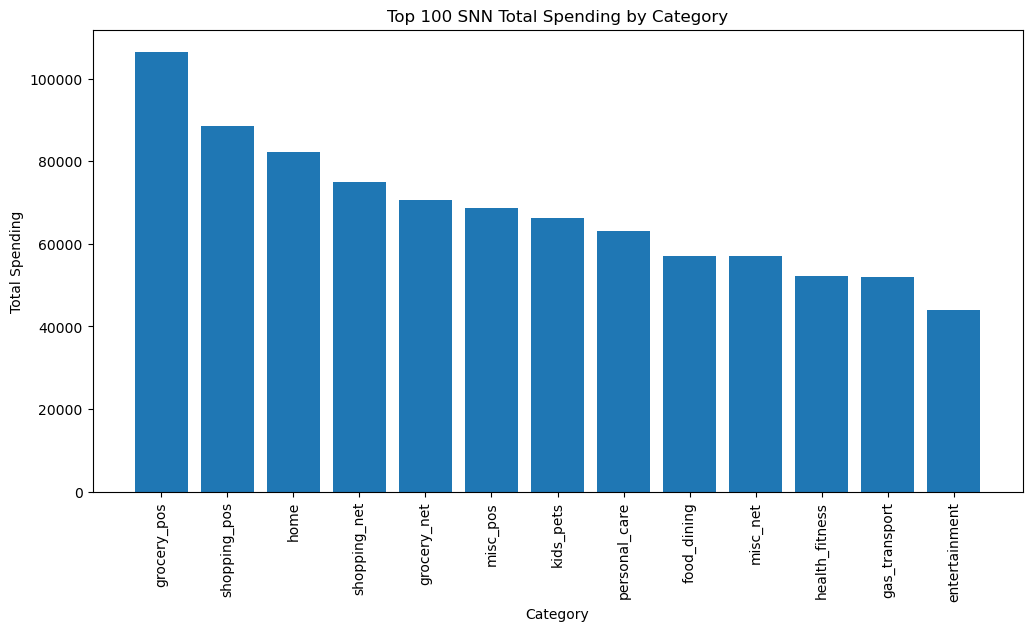

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(top_1000_data['category'], top_1000_data['amt'])
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 100 SNN Total Spending by Category')
plt.xticks(rotation=90)
plt.show()

Graph showing the year-wise top spending categories

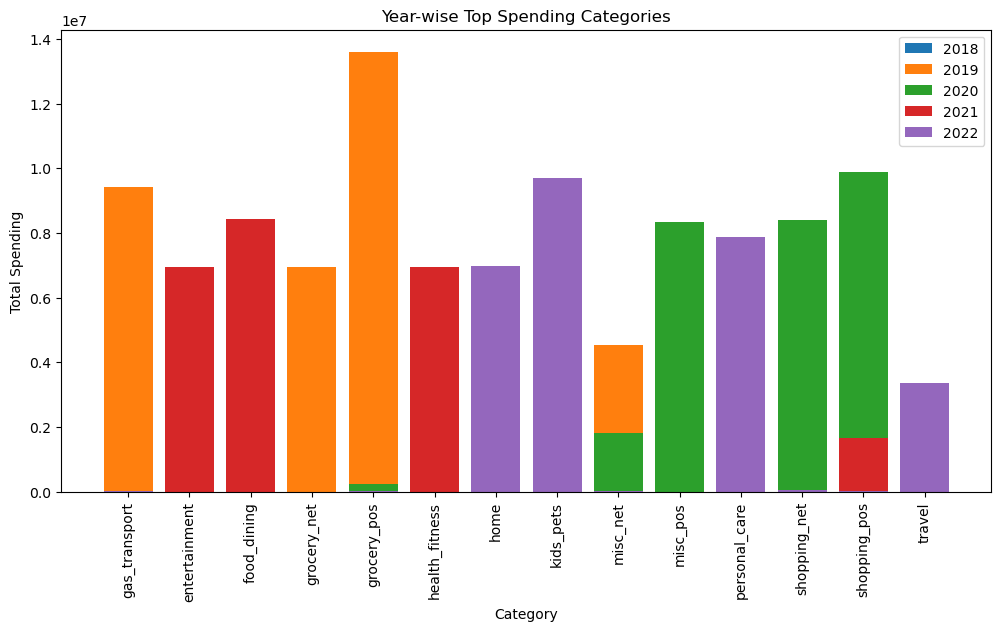

In [8]:
df = merged_data
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')
# Extract the year from the datetime
df['year'] = df['unix_time'].dt.year
# Group the data by 'year' and 'category' and calculate the sum of 'amt'
grouped_data = df.groupby(['year', 'category'])['amt'].sum().reset_index()
# Get the top spending category for each year
top_spending_categories = grouped_data.groupby('year')['amt'].idxmax()
top_spending_data = grouped_data.loc[top_spending_categories]
# Create the bar plot
plt.figure(figsize=(12, 6))
for year in top_spending_data['year']:
    year_data = grouped_data[grouped_data['year'] == year]
    plt.bar(year_data['category'], year_data['amt'], label=str(year))
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Year-wise Top Spending Categories')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Graph showing the transaction count based on gender per category

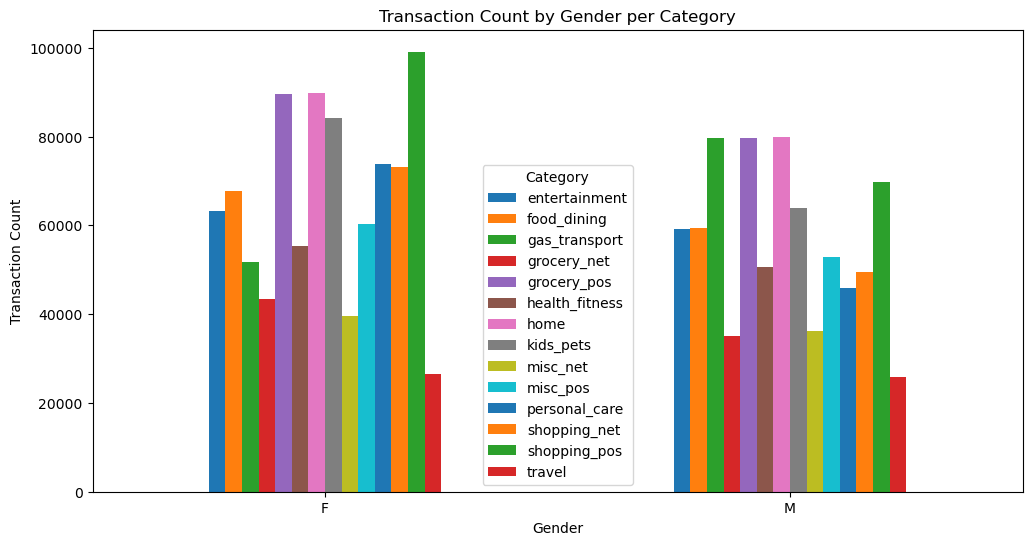

In [9]:
grouped_data = df.groupby(['gender', 'category'])['trans_num'].count().reset_index()
pivot_data = grouped_data.pivot(index='gender', columns='category', values='trans_num')
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Gender per Category')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

Graph showing the spending increment over time per category

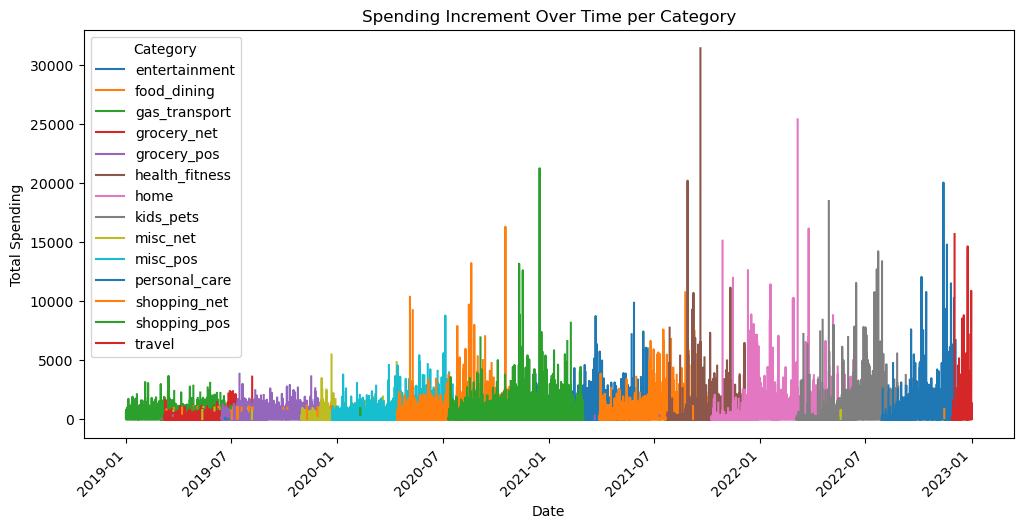

In [10]:
df['date'] = pd.to_datetime(df['unix_time'], unit='s')
grouped_data = df.groupby(['category', 'date'])['amt'].sum().reset_index()
pivot_data = grouped_data.pivot(index='date', columns='category', values='amt')
pivot_data.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Spending Increment Over Time per Category')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

Graph showing which merchant receives a lot of money

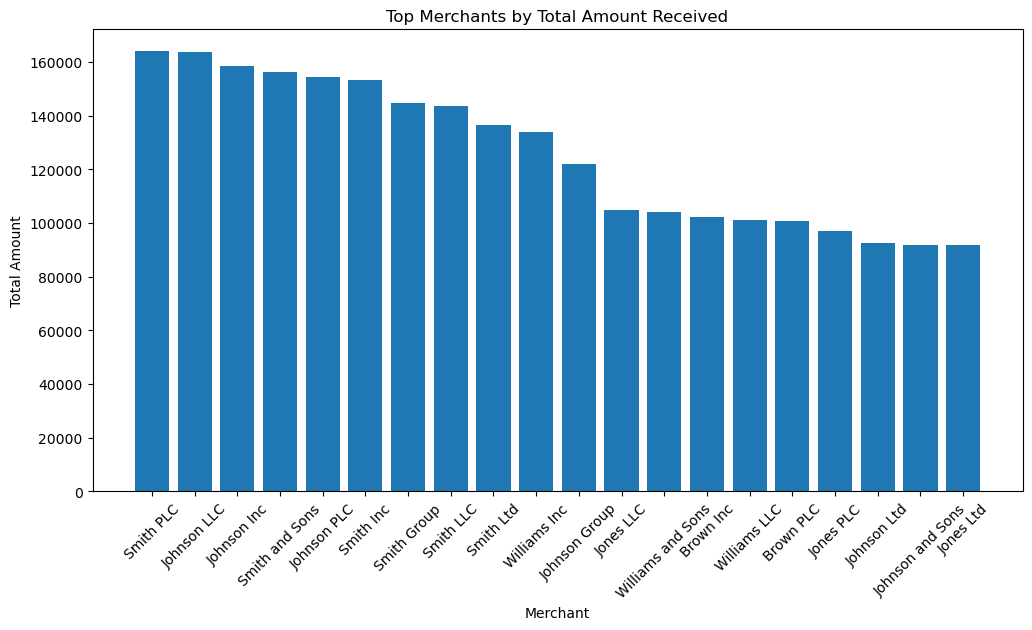

In [11]:
grouped_data = df.groupby('merchant')['amt'].sum().reset_index()
sorted_data = grouped_data.sort_values('amt', ascending=False)
top_merchants = sorted_data.head(20)  # Adjust the number of top merchants as needed
# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_merchants['merchant'], top_merchants['amt'])
plt.xlabel('Merchant')
plt.ylabel('Total Amount')
plt.title('Top Merchants by Total Amount Received')
plt.xticks(rotation=45)
plt.show()

Graph showing which gender faced more fraud

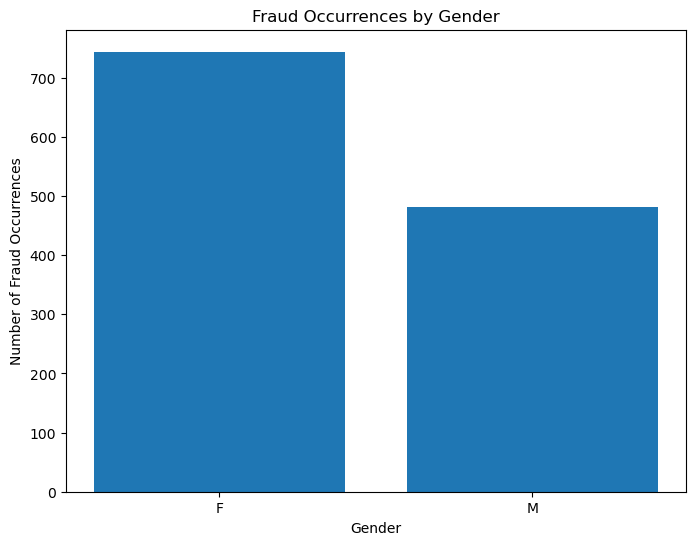

In [12]:
grouped_data = df.groupby('gender')['is_fraud'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['gender'], grouped_data['is_fraud'])
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Occurrences')
plt.title('Fraud Occurrences by Gender')
plt.show()

Line Plot of Transaction Volume Over Time
(This graph shows the transaction volume over time)

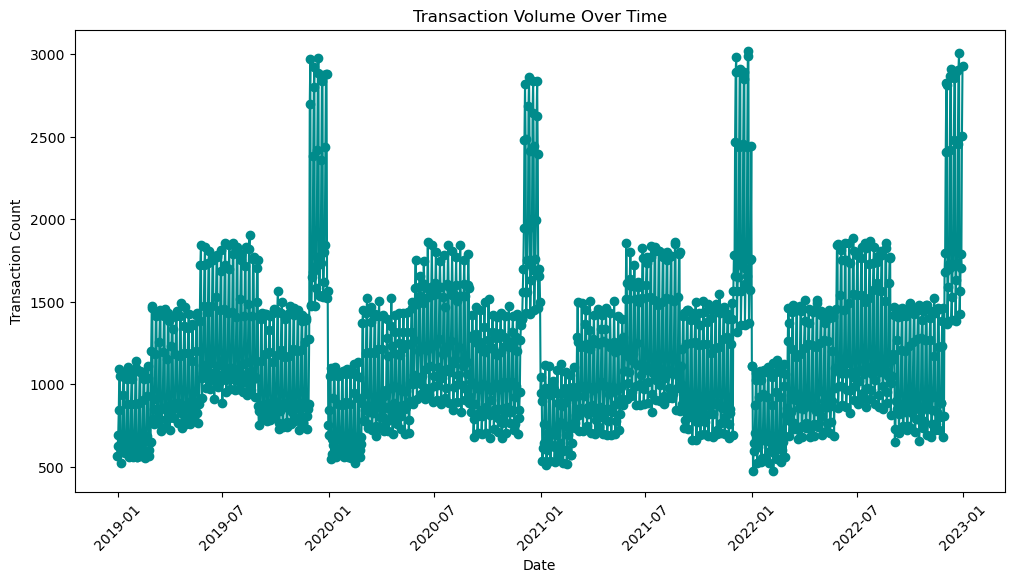

In [13]:
df['transaction_date'] = pd.to_datetime(df['unix_time'], unit='s').dt.date
transaction_counts = df['transaction_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
transaction_counts.plot(kind='line', marker='o', color='darkcyan')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Volume Over Time')
plt.xticks(rotation=45)
plt.show()

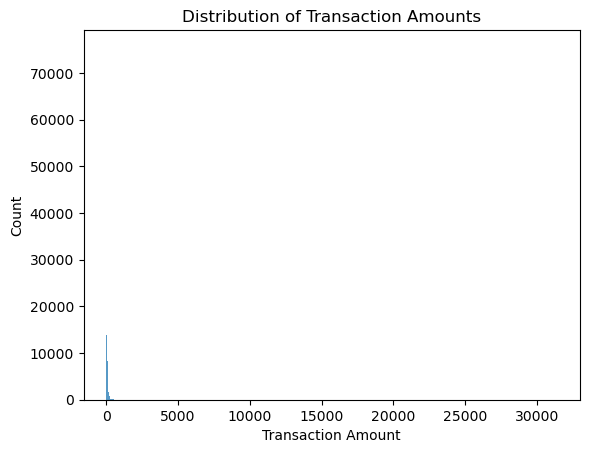

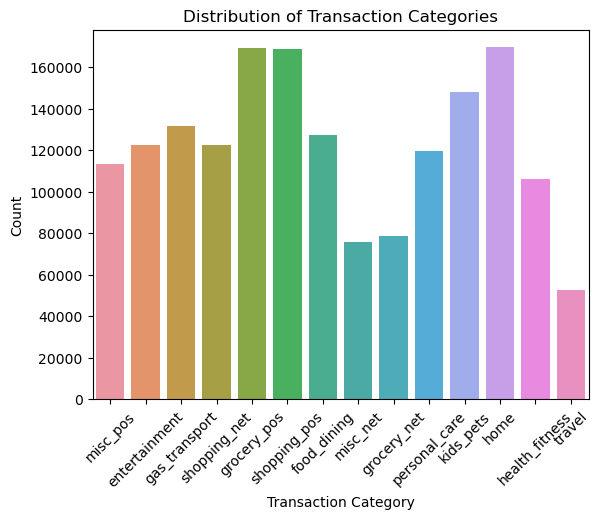

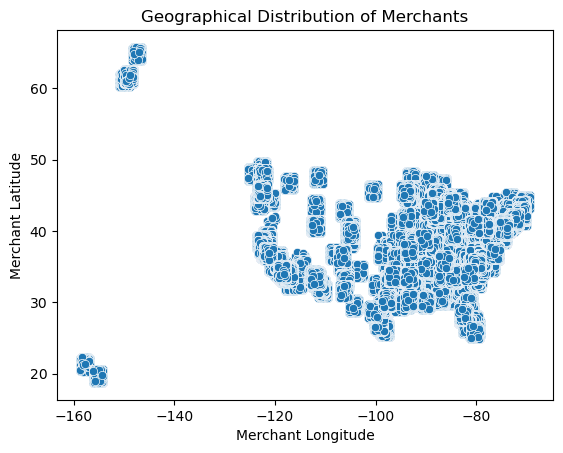

In [14]:
# Plot a histogram of transaction amounts
sns.histplot(data=merged_data, x='amt')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Plot a bar chart of transaction categories
sns.countplot(data=merged_data, x='category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=45)
plt.show()

# Plot a scatter plot of latitude and longitude of merchants
sns.scatterplot(data=merged_data, x='merch_long', y='merch_lat')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Geographical Distribution of Merchants')
plt.show()

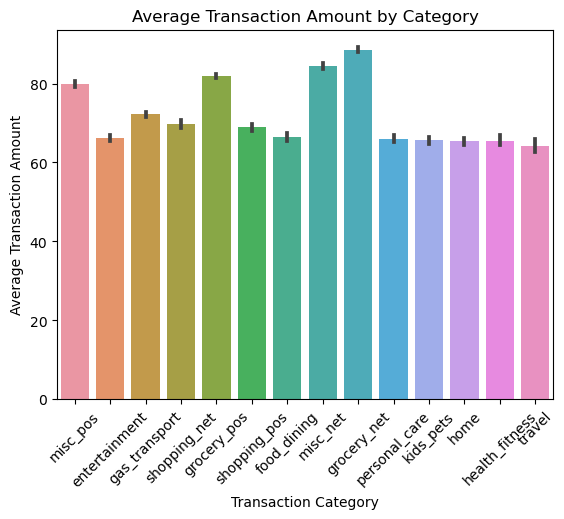

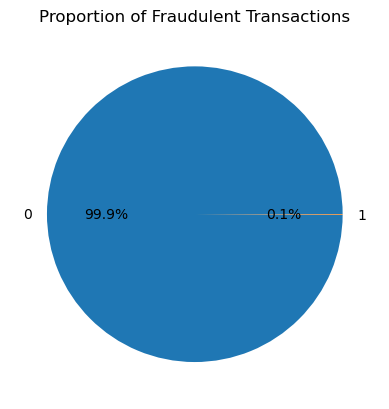

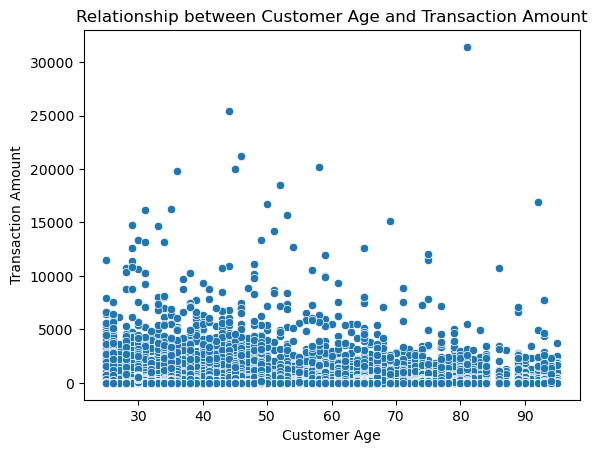

In [15]:
# Plot a bar chart of transaction categories with average transaction amount
sns.barplot(data=merged_data, x='category', y='amt')
plt.xlabel('Transaction Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()

# Plot a pie chart of transaction fraud proportions
fraud_counts = merged_data['is_fraud'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions')
plt.show()

# Plot a scatter plot of customer age (derived from 'dob') and transaction amount
merged_data['dob'] = pd.to_datetime(merged_data['dob'])
merged_data['age'] = (pd.to_datetime('today') - merged_data['dob']).astype('<m8[Y]')
sns.scatterplot(data=merged_data, x='age', y='amt')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.title('Relationship between Customer Age and Transaction Amount')
plt.show()


3. Creating new features from the existing data that could be useful in predicting CLV

i. Frequency of Transactions: Calculate the total number of transactions made by each customer.

In [16]:
transaction_frequency = merged_data.groupby('acct_num')['trans_num'].count().reset_index()
transaction_frequency.rename(columns={'trans_num': 'transaction_frequency'}, inplace=True)
merged_data = pd.merge(merged_data, transaction_frequency, on='acct_num', how='left')

ii. Average Transaction Amount: Calculate the average transaction amount for each customer.

In [17]:
average_transaction_amount = merged_data.groupby('acct_num')['amt'].mean().reset_index()
average_transaction_amount.rename(columns={'amt': 'average_transaction_amount'}, inplace=True)
merged_data = pd.merge(merged_data, average_transaction_amount, on='acct_num', how='left')

iii. Total Transaction Amount: Calculate the total transaction amount for each customer.

In [18]:
total_transaction_amount = merged_data.groupby('acct_num')['amt'].sum().reset_index()
total_transaction_amount.rename(columns={'amt': 'total_transaction_amount'}, inplace=True)
merged_data = pd.merge(merged_data, total_transaction_amount, on='acct_num', how='left')

iv. Time since First Transaction: Calculate the time duration since the first transaction for each customer.

In [19]:
merged_data['unix_time'] = pd.to_datetime(merged_data['unix_time'], unit='s')
first_transaction_time = merged_data.groupby('acct_num')['unix_time'].min().reset_index()
first_transaction_time['time_since_first_transaction'] = (pd.to_datetime('today') - first_transaction_time['unix_time']).dt.days
merged_data = pd.merge(merged_data, first_transaction_time[['acct_num', 'time_since_first_transaction']], on='acct_num', how='left')

4. Creating a CLV cloumn based on 'average_transaction_amount' and 'transaction_frequency'

CLV can be calculated in various ways, depending on the specific business context and available data. Here we will be creating CLV column based on the average transaction amount and the frequency of transactions

In [20]:
# Calculate CLV
merged_data['CLV'] = merged_data['average_transaction_amount'] * merged_data['transaction_frequency']
merged_data['CLV']

0          123080.32
1          123080.32
2          123080.32
3          123080.32
4          123080.32
             ...    
1705126    169742.40
1705127    169742.40
1705128    169742.40
1705129    169742.40
1705130    169742.40
Name: CLV, Length: 1705131, dtype: float64

6. Ploting graphs based on new features

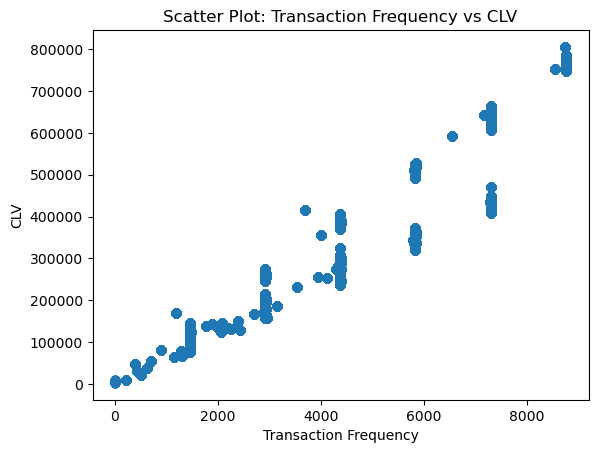

In [21]:
# Plot scatter plot
plt.scatter(merged_data['transaction_frequency'], merged_data['CLV'])
plt.xlabel('Transaction Frequency')
plt.ylabel('CLV')
plt.title('Scatter Plot: Transaction Frequency vs CLV')
plt.show()

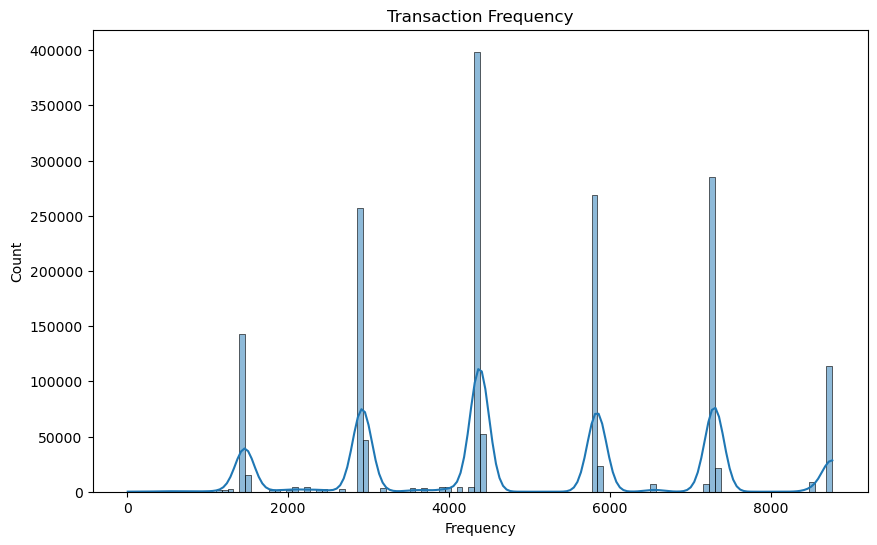

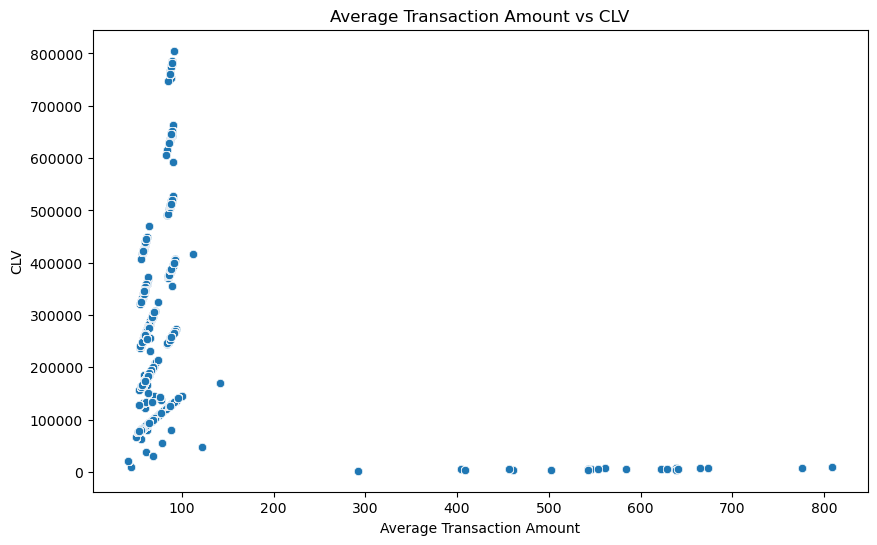

In [22]:
# Plot histogram of transaction frequency
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='transaction_frequency', kde=True)
plt.title('Transaction Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Plot scatter plot of average transaction amount vs CLV
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='average_transaction_amount', y='CLV')
plt.title('Average Transaction Amount vs CLV')
plt.xlabel('Average Transaction Amount')
plt.ylabel('CLV')
plt.show()


The first graph plots a histogram of the transaction frequency, showing the distribution of customer transaction frequencies. The second graph plots a scatter plot of the average transaction amount on the x-axis and the CLV on the y-axis, allowing you to visualize the relationship between these two variables.

### Step 4: Model Training

In [23]:
merged_data

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,year,date,transaction_date,age,transaction_frequency,average_transaction_amount,total_transaction_amount,time_since_first_transaction,CLV
0,3599621836677199,767424968491,ae56f7ac5f358dc9f1687bb1c63d229c,2020-02-01 18:05:36,misc_pos,28.31,0,King-Nguyen,40.090754,-104.110826,...,1936-02-26,2020,2020-02-01 18:05:36,2020-02-01,87.0,2069,59.487830,123080.32,1599,123080.32
1,3599621836677199,767424968491,7dead700180c288b8c7e269ef228f4d6,2020-12-08 21:50:05,entertainment,588.07,0,Kent-Lee,39.380580,-104.979279,...,1936-02-26,2020,2020-12-08 21:50:05,2020-12-08,87.0,2069,59.487830,123080.32,1599,123080.32
2,3599621836677199,767424968491,af5d266facca97758cd2f4f94a93708e,2019-03-09 23:47:48,gas_transport,5.11,0,Townsend-Taylor,39.224870,-105.999769,...,1936-02-26,2019,2019-03-09 23:47:48,2019-03-09,87.0,2069,59.487830,123080.32,1599,123080.32
3,3599621836677199,767424968491,c24b06dfe405827196ae72ff9e878439,2020-07-05 16:19:06,shopping_net,1.08,0,Wilkins-Hamilton,39.894093,-104.834570,...,1936-02-26,2020,2020-07-05 16:19:06,2020-07-05,87.0,2069,59.487830,123080.32,1599,123080.32
4,3599621836677199,767424968491,5807a4106d24f2346316728b991b3a74,2020-12-22 20:45:21,entertainment,9.66,0,"Patterson, Fleming and Sanchez",40.640231,-105.543930,...,1936-02-26,2020,2020-12-22 20:45:21,2020-12-22,87.0,2069,59.487830,123080.32,1599,123080.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705126,6011969874869415,976596062877,55d5bce8a4fb44a738e4161e8a84354b,2022-08-26 04:27:23,kids_pets,524.40,0,"Yu, George and Ryan",33.205210,-92.552918,...,1993-04-26,2022,2022-08-26 04:27:23,2022-08-26,30.0,1195,142.043849,169742.40,922,169742.40
1705127,6011969874869415,976596062877,e0c275b51e16a50ce16c621c580d75d7,2022-08-23 04:22:56,kids_pets,475.71,0,Norman-Hanson,34.060344,-92.933577,...,1993-04-26,2022,2022-08-23 04:22:56,2022-08-23,30.0,1195,142.043849,169742.40,922,169742.40
1705128,6011969874869415,976596062877,316db17a0b0888dec9e9d29c2e1aff0e,2021-09-17 10:38:34,health_fitness,478.33,0,Trevino Group,33.631931,-93.740141,...,1993-04-26,2021,2021-09-17 10:38:34,2021-09-17,30.0,1195,142.043849,169742.40,922,169742.40
1705129,6011969874869415,976596062877,ca81fd9d698069a12aebad3474c472a1,2022-02-13 07:32:12,home,560.93,0,"Brown, Watkins and Moody",32.809922,-94.270471,...,1993-04-26,2022,2022-02-13 07:32:12,2022-02-13,30.0,1195,142.043849,169742.40,922,169742.40


1. Creating a Linear Regression Model using new features

Mean Squared Error (MSE): 8.410641433390422e-16
Root Mean Squared Error (RMSE): 2.900110589855225e-08
R-squared (R2) Score: 1.0



Print the first 10 predictions:
[776967.92999996 264583.61000002 132891.38999997 260034.30000002
 338721.26000004 355672.88999997 390193.51999997 398775.40999997
 190180.82       773778.44999996]


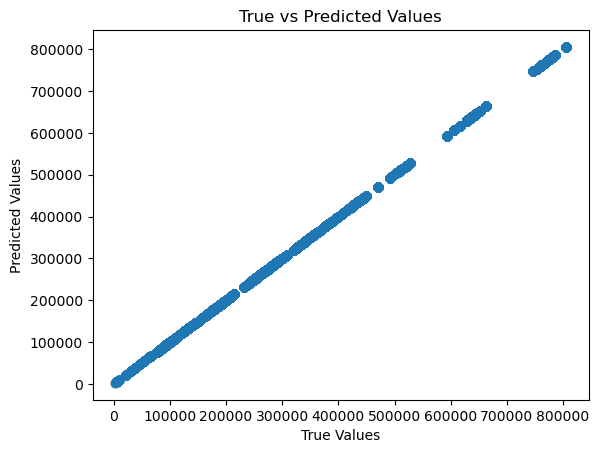

In [24]:
X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = reg_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score, end="\n\n\n\n")

# Print the first 10 predictions
print("Print the first 10 predictions:")
print(y_pred[:10])

# Create a scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

For evaluating a linear regression model, we are focusing on metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared (R2) score. These metrics provide insights into how well the model is able to predict continuous values. We have plotted the predicted values against the true values using a scatter plot above.

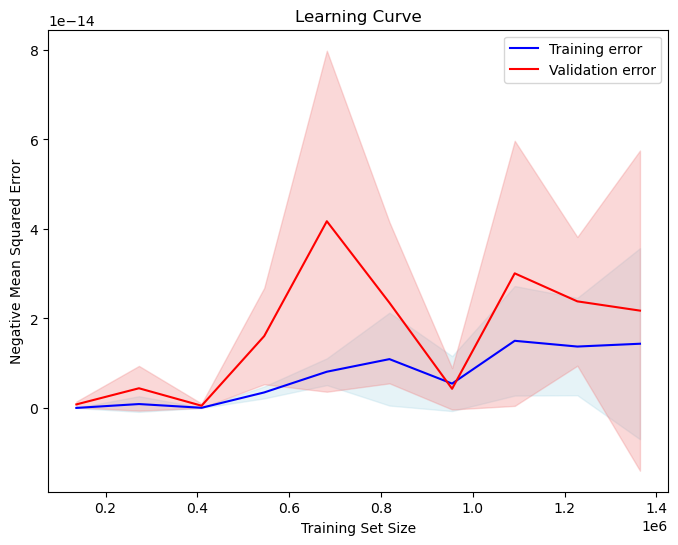

In [25]:
# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(reg_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training error', color='blue')
plt.plot(train_sizes, test_mean, label='Validation error', color='red')

# Draw the bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue', alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral', alpha=0.3)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')

# Show the plot
plt.show()

Mean Squared Error (MSE): 1.22446306052368e-13
Root Mean Squared Error (RMSE): 3.499232859533186e-07
R-squared (R2) Score: 1.0


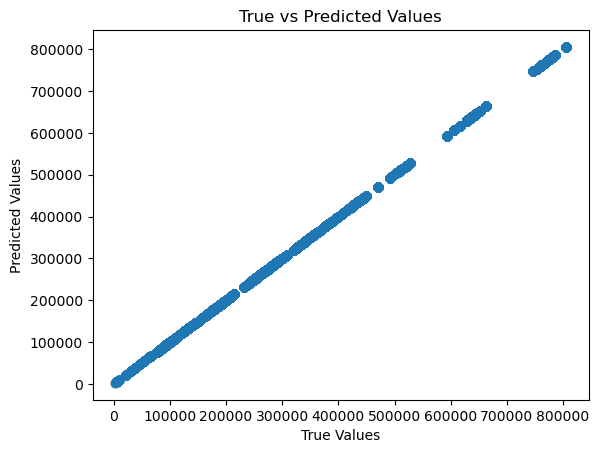

In [26]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = reg_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

# Create a scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics for your model
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate performance metrics for the baseline (e.g., using mean or median)
y_baseline = np.full_like(y_test, y_train.mean())  # Use mean as the baseline
baseline_mse = mean_squared_error(y_test, y_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, y_baseline)

# Print the performance metrics
print("Model Performance Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print()

print("Baseline Performance Metrics:")
print("Mean Squared Error (MSE):", baseline_mse)
print("Root Mean Squared Error (RMSE):", baseline_rmse)
print("R-squared (R2) Score:", baseline_r2)

Model Performance Metrics:
Mean Squared Error (MSE): 1.22446306052368e-13
Root Mean Squared Error (RMSE): 3.499232859533186e-07
R-squared (R2) Score: 1.0

Baseline Performance Metrics:
Mean Squared Error (MSE): 35180725566.10877
Root Mean Squared Error (RMSE): 187565.25682041643
R-squared (R2) Score: -7.317909870963035e-06


In this code, the performance metrics for the model are calculated using the predicted values y_pred and the actual values y_test. The metrics include mean squared error (MSE), root mean squared error (RMSE), and R-squared (R2) score, which measures the proportion of the variance in the target variable that is predictable by the model.

For the baseline, I have used a simple strategy such as predicting the mean or median value of the training target variable for all test instances. In the above code block, the mean value of the training target variable y_train.mean() is used as the baseline prediction y_baseline. The same performance metrics are then calculated for the baseline.

By comparing the performance metrics of the model with those of the baseline, we can assess whether the model provides better predictions than a simple baseline approach. (Lower MSE and RMSE values and higher R2 scores indicate better model performance compared to the baseline.)

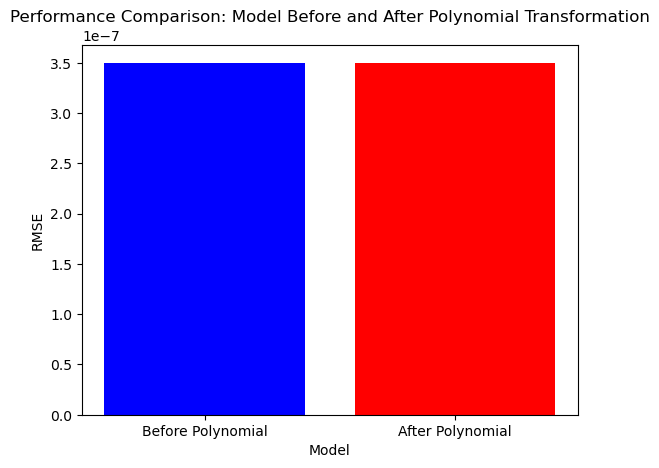

In [28]:
# Calculate performance metrics for the model before polynomial transformation
y_pred_before = reg_model.predict(X_test)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a new linear regression model
reg_model_poly = LinearRegression()

# Train the model on the polynomial features
reg_model_poly.fit(X_train_poly, y_train)

# Make predictions on the testing data with polynomial features
y_pred_poly = reg_model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Plot the performance comparison
labels = ['Before Polynomial', 'After Polynomial']
rmse_values = [rmse_before, rmse_poly]

plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Performance Comparison: Model Before and After Polynomial Transformation')
plt.show()

In this code, the root mean squared error (RMSE) values are calculated for the model before and after applying the polynomial features. The RMSE values are then plotted using a bar plot, where the blue bar represents the model's performance before the polynomial transformation, and the red bar represents the performance after the transformation. The x-axis shows the model labels, and the y-axis represents the RMSE values.

2. Tuning the model hyperparameters for better performance of the model

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error (MSE): 1.22446306052368e-13
Root Mean Squared Error (RMSE): 3.499232859533186e-07
R-squared (R2) Score: 1.0

Print the first 10 predictions:
[776967.92999964 264583.60999969 132891.38999954 260034.2999997
 338721.25999977 355672.88999956 390193.51999956 398775.40999955
 190180.81999963 773778.44999965]


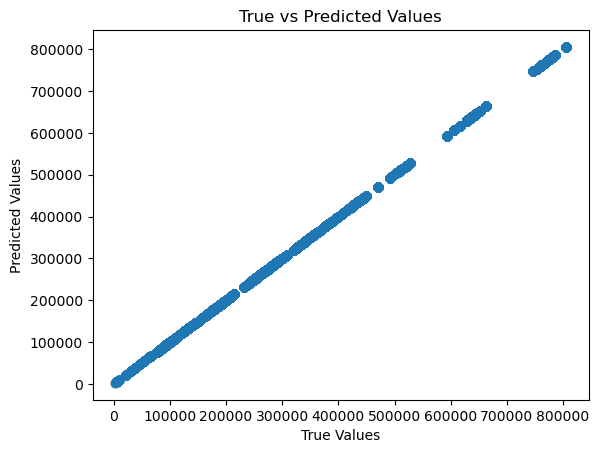

In [29]:
# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# Create a linear regression model
reg_model = LinearRegression()

# Perform grid search with cross-validation
reg_model_grid_search = GridSearchCV(reg_model, param_grid, cv=5)
reg_model_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = reg_model_grid_search.best_params_
best_model = reg_model_grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score, end="\n\n")

# Print the first 10 predictions
print("Print the first 10 predictions:")
print(y_pred[:10])

# Create a scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

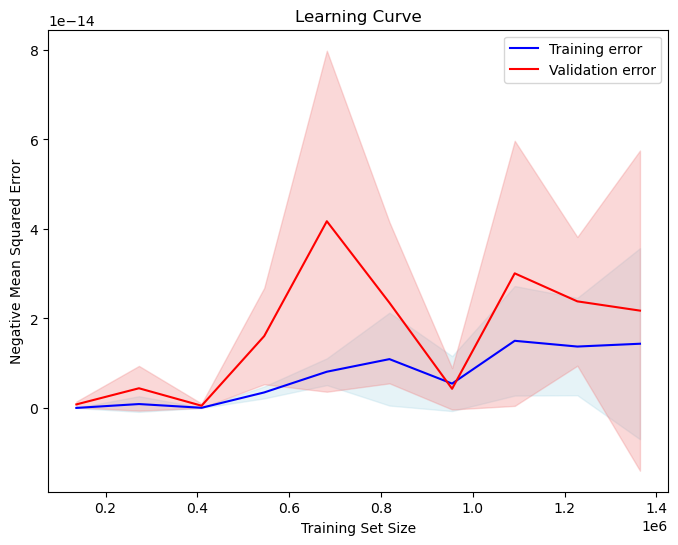

In [30]:
# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training error', color='blue')
plt.plot(train_sizes, test_mean, label='Validation error', color='red')

# Draw the bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue', alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral', alpha=0.3)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')

# Show the plot
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # Adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a polynomial regression model
reg_model_poly_grid_search = LinearRegression()

# Train the model on the polynomial features
reg_model_poly_grid_search.fit(X_train_poly, y_train)

# Make predictions on the testing data with polynomial features
y_pred_poly = reg_model_poly_grid_search.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_score_poly = reg_model_poly_grid_search.score(X_test_poly, y_test)

print("Polynomial Regression Performance Metrics:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2) Score:", r2_score_poly)

Polynomial Regression Performance Metrics:
Mean Squared Error (MSE): 190140917.9169767
Root Mean Squared Error (RMSE): 13789.159434750789
R-squared (R2) Score: 0.9945952703848084


In this code, the PolynomialFeatures class from scikit-learn is used to transform the original features into polynomial features with a higher degree. You can adjust the degree parameter to specify the desired degree of the polynomial. Then, a new linear regression model reg_model_poly is created and trained on the polynomial features X_train_poly. The model is evaluated on the testing data with polynomial features, and the performance metrics are calculated and printed.

By using polynomial features, the model becomes more flexible and can capture non-linear relationships in the data, which helps alleviate underfitting. 

In [32]:
from sklearn.metrics import r2_score as r2
# Create polynomial features
poly = PolynomialFeatures(degree=3)  # Adjust the degree as needed
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a new linear regression model with polynomial features
reg_model_poly = LinearRegression()

# Train the model on the polynomial features
reg_model_poly.fit(X_train_poly, y_train)

# Make predictions on the testing data with polynomial features
y_pred_poly = reg_model_poly.predict(X_test_poly)

# Evaluate the model with polynomial features
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_score_poly = r2(y_test, y_pred_poly)

# Calculate baseline performance
y_baseline = np.full_like(y_test, y_train.mean())  # Use mean as the baseline
baseline_mse = mean_squared_error(y_test, y_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2_score = r2(y_test, y_baseline)

# Print the performance metrics
print("Polynomial Regression Performance Metrics:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2) Score:", r2_score_poly)
print()
print("Baseline Performance Metrics:")
print("Mean Squared Error (MSE):", baseline_mse)
print("Root Mean Squared Error (RMSE):", baseline_rmse)
print("R-squared (R2) Score:", baseline_r2_score)
print()

# Plot the performance comparison
labels = ['Model with Polynomial Features', 'Baseline']
rmse_values = [rmse_poly, baseline_rmse]

Polynomial Regression Performance Metrics:
Mean Squared Error (MSE): 0.08810878911479278
Root Mean Squared Error (RMSE): 0.29683124686392565
R-squared (R2) Score: 0.9999999999974956

Baseline Performance Metrics:
Mean Squared Error (MSE): 35180725566.10877
Root Mean Squared Error (RMSE): 187565.25682041643
R-squared (R2) Score: -7.317909870963035e-06



In this code, after applying the polynomial transformation to the features using PolynomialFeatures, the polynomial regression model (reg_model_poly) is trained and evaluated on the testing data with polynomial features. The evaluation metrics, including MSE, RMSE, and R-squared score, are calculated for the polynomial model.

A baseline prediction is also generated using the mean value of the training target variable, and the baseline performance metrics are calculated. Finally, a bar plot is created to compare the RMSE values between the polynomial model and the baseline.

In [33]:
#code to save all the above models
import joblib

# Save the  Linear Regression model
joblib.dump(reg_model, 'linear_regression_model.pkl')
joblib.dump(reg_model_poly_grid_search, 'reg_model_poly_grid_search.joblib')
joblib.dump(reg_model_grid_search, 'reg_model_grid_search.joblib')

['reg_model_grid_search.joblib']

3. Creating another model using Random Forest

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separate the features (X) and target variable (y)
X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

Mean Squared Error (MSE): 0.0037291912391644744
Root Mean Squared Error (RMSE): 0.06106710439479241
R-squared (R2) Score: 0.999999999999894


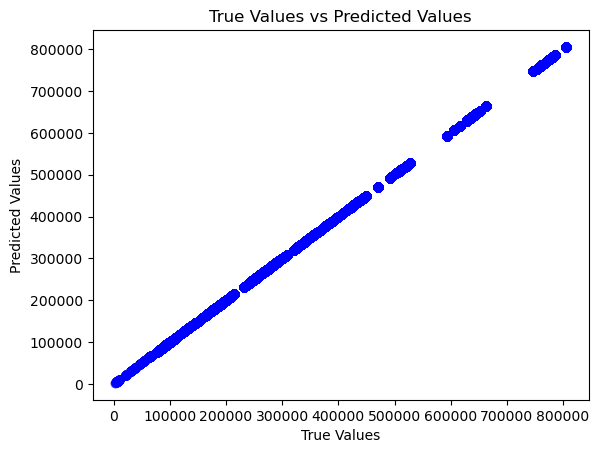

In [35]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 1000  # Adjust the value as needed

# Create a scatter plot of true values versus predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

The plot creates a scatter plot where the x-axis represents the true values (y_test) and the y-axis represents the predicted values (y_pred). Each data point is represented as a blue dot. This plot helps visualize the relationship between the true and predicted values.

4. Tuning the model hyperparameters for better performance of the model

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the random forest
    'max_depth': [None, 5, 10],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Create a random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model: RandomForestRegressor(random_state=42)


5. Creating another model using Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = gb_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

Mean Squared Error (MSE): 563135.5159778388
Root Mean Squared Error (RMSE): 750.423557717799
R-squared (R2) Score: 0.9999839929498926


6. Tuning the model hyperparameters for better performance of the model

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error (MSE): 564.3083168733981
Root Mean Squared Error (RMSE): 23.75517452837167
R-squared (R2) Score: 0.9999999839596132


### Step 5: Model Deployment
Saving all the models, so that the models are ready for deployment

In [39]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.externals import joblib
import joblib
# Save the GradientBoostingRegressor model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
# Save the RandomForestRegressor model
joblib.dump(rf_model, 'random_forest_model.pkl')

In [ ]:
# Save the  Linear Regression model
joblib.dump(reg_model, 'linear_regression_model.pkl')

In [40]:
import joblib
joblib.dump(grid_search, 'grid_search.joblib')

['grid_search.joblib']

## Comparing all the models

### Baseline Performance Mertics:
Mean Squared Error (MSE): 35180725566.10877<br>
Root Mean Squared Error (RMSE): 187565.25682041643<br>
R-squared (R2) Score: -7.317909870963035e-06<br>
### 1. Linear Regression Model
Mean Squared Error (MSE): 8.410641433390422e-16<br>
Root Mean Squared Error (RMSE): 2.900110589855225e-08<br>
R-squared (R2) Score: 1.0<br>
### 2. Linear regression Model with polynomial features 
Model Performance Metrics:<br>
Mean Squared Error (MSE): 1.22446306052368e-13<br>
Root Mean Squared Error (RMSE): 3.499232859533186e-07<br>
R-squared (R2) Score: 1.0<br>
### 3. Linear Regression Model, Hyper Parameters tuned with GridSearch
Best Hyperparameters: {'fit_intercept': True}<br>
Mean Squared Error (MSE): 1.22446306052368e-13<br>
Root Mean Squared Error (RMSE): 3.499232859533186e-07<br>
R-squared (R2) Score: 1.0<br>
### 4. Linear Regression Model, Hyper Parameters tuned with GridSearch, with polynomial feature
Mean Squared Error (MSE): 0.08810878911479278<br>
Root Mean Squared Error (RMSE): 0.29683124686392565<br>
R-squared (R2) Score: 0.9999999999974956<br>
### 5. Random Forest
Mean Squared Error (MSE): 0.0037291912391644744<br>
Root Mean Squared Error (RMSE): 0.06106710439479241<br>
R-squared (R2) Score: 0.999999999999894<br>
### 6. Random Forest hyper parameter tuned using GridSearch 
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}<br>
Best Model: RandomForestRegressor(random_state=42) <br>
### 7. Gradient Boosting model
Mean Squared Error (MSE): 563135.5159778388<br>
Root Mean Squared Error (RMSE): 750.423557717799<br>
R-squared (R2) Score: 0.9999839929498926<br>
### 8. Gradient Boosting hyper parameters tuned using Grid Search 
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}<br>
Mean Squared Error (MSE): 564.3083168733981<br>
Root Mean Squared Error (RMSE): 23.75517452837167<br>
R-squared (R2) Score: 0.9999999839596132<br>
<br><br><br>

Based on these metrics, the models that appear to have better performance are:

1. Linear Regression Model with Polynomial Features<br>
2. Linear Regression Model with Hyperparameters Tuned using GridSearch and Polynomial Feature<br>
3. Random Forest Model<br>
4. Gradient Boosting Model with Hyperparameters Tuned using GridSearch<br>
<br><br>
<h3>
The Linear Regression Model with Hyperparameters Tuned using GridSearch and Polynomial Feature appears to be the best performing model for CLV prediction. It has the lowest MSE and RMSE values, indicating better accuracy in predicting CLV. Additionally, it achieves a high R2 score of 0.9999999999974956, indicating a very good fit to the data.</h3>

<br><br><br><br>
<h3><center>End of CLV Part</center></h3>
<center><h4>
<a href="https://github.com/hemangsharma/36106_UTS_Assignment3">Github Link</a>
</h4></center>